In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy import stats

In [2]:
x=pd.read_csv('../../../_xlable4_withNa_AllColumns.txt')
y=pd.read_csv('../../../_targelable4_withNa_AllColumns.txt')

y=y[['Unnamed: 0','L504700', ]]

In [3]:
data= pd.merge(x,y, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data['FIELD_6_7']=np.min(data[['FIELD_6','FIELD_7']],axis=1)
data=data.drop(columns=['FIELD_6','FIELD_7'])

In [4]:
# filter the data set 
data=data[data.FIELD_16!=1] # exclude people who are diagnosed for (diabetes) 
data=data[data.FIELD_23!=1] # exclude people who are on medication for diabetes

data=data[data.FIELD_15!=1] # exclude people who are diagnosed for (high blood pressure)
data=data[data.FIELD_22!=1] # exclude people who are on medication for high blood pressure

data=data[data.FIELD_17!=1] # exclude people who are diagnosed for hyperlipidemia
data=data[data.FIELD_24!=1] # exclude people who are on medication for hyperlipidemia

print(data.shape)

(159381, 408)


In [5]:
#split column types to categorical and numerical
numerical_cols = list(data.columns[~data.columns.str.startswith('FIELD')])
categorical_cols = list(data.columns[data.columns.str.startswith('FIELD')])
numerical_cols.remove('SEX')
categorical_cols.append('SEX')

Calculate correlation Value - for numerical values
========

In [6]:
corr=data[numerical_cols].corr()
corr=corr.L504700_y
corrvalPD=pd.DataFrame()
corrvalPD['Col']=corr.index
corrvalPD['val']=abs(corr.values)

corrvalPD=corrvalPD.sort_values(by='val',ascending=False)
corrvalPD.head()

,Col,val
277,L504700_y,1.000000
133,L393800,1.000000
115,L303201,0.835953
161,L504700_x,0.731155
77,L157500,0.673960


In [7]:
#count of none NA values of feature set
mydataset=data.copy()[numerical_cols]
colCount=[]
for i in mydataset.columns:
    colCount.append([i,mydataset[i].dropna().shape[0]])

colCountPD=pd.DataFrame(colCount,columns=['Col','Count'])
colCountPD.head()

,Col,Count
0,Unnamed: 0,159381
1,index,159381
2,COMPARE,159381
3,AGE,159381
4,B_DAY,159381


In [8]:
mergedColCorrCount=pd.merge(corrvalPD,colCountPD,how='inner',left_on='Col',right_on='Col')
mergedColCorrCount=mergedColCorrCount[mergedColCorrCount.Count>50000]
mergedColCorrCount=mergedColCorrCount.sort_values(by='val', ascending=False)
mergedColCorrCount.head(20)

,Col,val,Count
0,L504700_y,1.000000,137837
3,L504700_x,0.731155,135994
35,L190500,0.187278,159204
36,L190400,0.183070,159241
39,AGE,0.174117,159381
40,B_DAY,0.170251,159381
41,L100500,0.164421,158954
52,L101700,0.133911,158951
56,L190300,0.126738,159204
58,L100700,0.122422,152474


In [9]:
print(list(mergedColCorrCount.head(17).Col))

['L504700_y', 'L504700_x', 'L190500', 'L190400', 'AGE', 'B_DAY', 'L100500', 'L101700', 'L190300', 'L100700', 'L101600', 'S000100', 'L190700', 'L100800', 'S000501', 'L190600', 'L103300']


Anova test - For categorical values [Questionnaire answers]
=======

In [10]:
mydataset=data.copy()[categorical_cols] #[np.insert(categorical_cols,0,'L100800')]


mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
                                  'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
                                 'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
                                 'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
                                 'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
                                  'FIELD_137','FIELD_138','FIELD_139','FIELD_140',
                                  'FIELD_64','FIELD_65','FIELD_66','FIELD_67','FIELD_68','FIELD_69','FIELD_70','FIELD_72',
                                  'FIELD_73','FIELD_74','FIELD_75','FIELD_76','FIELD_77','FIELD_80','FIELD_81','FIELD_84',
                                  'FIELD_85','FIELD_90','FIELD_93','FIELD_94','FIELD_95','FIELD_96','FIELD_97','FIELD_98',
                                  'FIELD_101','FIELD_102','FIELD_105','FIELD_106','FIELD_112','FIELD_113','FIELD_114',
                                  'FIELD_115','FIELD_116','FIELD_117','FIELD_118','FIELD_119','FIELD_9'
                                 ])


mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='`'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='G'].index)


mydataset=mydataset.drop(mydataset[mydataset.FIELD_4=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_5=='.'].index)

mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='?'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_36=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_37=='\\'].index)
 
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '7+' ].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '5~7'].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '3-4'].index)


# mydataset=mydataset.drop(mydataset[mydataset.FIELD_95=='.'].index)

In [11]:
colslist=mydataset.columns
DiabeticColVals=data.L504700_y

cor=[]
pval=[]
count=[]

for i in range(len(colslist)):
    print(i,colslist[i])
    
    temp=pd.DataFrame([])
    temp['a']=DiabeticColVals
    temp['b']=mydataset[colslist[i]].astype(float)
    temp=temp.dropna()
    count.append(temp.shape[0])
    
    uniquevalues=temp.b.unique()
    
    selectedGroupVals=[]
    for k in range(len(uniquevalues)):
        selectedGroupVals.append(np.asarray(temp[temp['b']==uniquevalues[k]].a))

    F, p = stats.f_oneway(*selectedGroupVals)
    cor.append(F)
    pval.append(p)
    

0 FIELD_3
1 FIELD_4
2 FIELD_5
3 FIELD_13
4 FIELD_14
5 FIELD_15
6 FIELD_16
7 FIELD_17
8 FIELD_18
9 FIELD_19
10 FIELD_20
11 FIELD_21
12 FIELD_22
13 FIELD_23
14 FIELD_24
15 FIELD_25
16 FIELD_26
17 FIELD_27
18 FIELD_28
19 FIELD_29
20 FIELD_30
21 FIELD_31
22 FIELD_32
23 FIELD_33
24 FIELD_34
25 FIELD_35
26 FIELD_36
27 FIELD_37
28 FIELD_38
29 FIELD_40
30 FIELD_41
31 FIELD_42
32 FIELD_43
33 FIELD_44
34 FIELD_45
35 FIELD_46
36 FIELD_47
37 FIELD_48
38 FIELD_49
39 FIELD_50
40 FIELD_51
41 FIELD_52
42 FIELD_53
43 FIELD_54
44 FIELD_55
45 FIELD_56
46 FIELD_57
47 FIELD_58
48 FIELD_59
49 FIELD_60
50 FIELD_61
51 FIELD_62
52 FIELD_63
53 FIELD_6_7
54 SEX


In [12]:
FvalPvalCorr=pd.DataFrame()    
FvalPvalCorr['Cols']=colslist
FvalPvalCorr['F']=cor
FvalPvalCorr['P']=pval
FvalPvalCorr['Count']=count
FvalPvalCorr=FvalPvalCorr.sort_values(by='F', ascending=False)


In [13]:
FvalPvalCorr[FvalPvalCorr.Count>50000].head(10)

,Cols,F,P,Count
54,SEX,7095.109942,0.000000e+00,137835
23,FIELD_33,2161.712209,0.000000e+00,137552
53,FIELD_6_7,895.512505,0.000000e+00,51656
1,FIELD_4,373.738129,0.000000e+00,135727
28,FIELD_38,253.096160,0.000000e+00,137564
19,FIELD_29,168.974293,1.305977e-38,137820
29,FIELD_40,137.418088,1.060896e-202,137564
11,FIELD_21,80.135061,3.538701e-19,137821
30,FIELD_41,71.945874,2.095507e-104,137540
17,FIELD_27,31.461627,2.038093e-08,137820


In [14]:
print(list(FvalPvalCorr[FvalPvalCorr.Count>50000].Cols)[:10])

['SEX', 'FIELD_33', 'FIELD_6_7', 'FIELD_4', 'FIELD_38', 'FIELD_29', 'FIELD_40', 'FIELD_21', 'FIELD_41', 'FIELD_27']


========================= LASSO method
================

In [15]:
selectedcols=['L504700_y', 'L504700_x', 'L190500', 'L190400', 'AGE', 'L100500', 'L101700', 'L190300', 'L100700', 
              'L101600', 'S000100', 'L190700', 'L100800', 'S000501', 'L190600', 'L103300','SEX', 'FIELD_33', 
              'FIELD_6_7', 'FIELD_4', 'FIELD_38', 'FIELD_29', 'FIELD_40', 'FIELD_21', 'FIELD_41', 'FIELD_27'
             ]
data2=data[selectedcols].copy().dropna()
print(data2.shape)

(41962, 26)


In [16]:
x=data2[['L504700_x', 'L190500', 'L190400', 'AGE', 'L100500', 'L101700', 'L190300', 'L100700', 
              'L101600', 'S000100', 'L190700', 'L100800', 'S000501', 'L190600', 'L103300','SEX', 'FIELD_33', 
              'FIELD_6_7', 'FIELD_4', 'FIELD_38', 'FIELD_29', 'FIELD_40', 'FIELD_21', 'FIELD_41', 'FIELD_27']]
y=data2.L504700_y

In [17]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x,y)

print(clf.coef_)

print(clf.intercept_)  

# pd.DataFrame([x.columns.ravel(),clf.coef_.ravel()],columns=['Name','coeff'])

lassod=pd.DataFrame()
lassod['Name']=x.columns
lassod['coeff']=clf.coef_
lassod

lassod=lassod.drop(lassod[lassod.coeff==0].index)
lassod.coeff=abs(lassod.coeff)
lassod=lassod.sort_values(by='coeff', ascending=False)
lassod

[ 7.06030298e-01  0.00000000e+00 -0.00000000e+00  7.66229214e-03
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  2.09013649e-04 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.73962634e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00]
0.04059953894798163


,Name,coeff
0,L504700_x,0.706030
3,AGE,0.007662
13,L190600,0.000474
8,L101600,0.000209


In [18]:
print(list(lassod.Name[:16]))

['L504700_x', 'AGE', 'L190600', 'L101600']


=============================== SelectKBest method
========================

In [19]:
# from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

# x=x[x.columns[:15]]
print(list(x.columns[:12]))

['L504700_x', 'L190500', 'L190400', 'AGE', 'L100500', 'L101700', 'L190300', 'L100700', 'L101600', 'S000100', 'L190700', 'L100800']


========================================= LinearSVC
===============

In [20]:
# from sklearn.svm import LinearSVC
# from sklearn.datasets import load_iris
# from sklearn.feature_selection import SelectFromModel

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(x)
# X_new.shape

In [21]:
# X_new

================================ SequentialFeatureSelector 
================================

In [22]:
# from sklearn.linear_model import LinearRegression
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# from sklearn.ensemble import RandomForestRegressor

# lr = RandomForestRegressor()

# sfs = SFS(lr, 
#           k_features=13, 
#           forward=True, 
#           floating=False, 
#           scoring='neg_mean_squared_error',
#           cv=5)

# sfs = sfs.fit(x, y)
# fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

# plt.title('Sequential Forward Selection (w. StdErr)')
# plt.grid()
# plt.show()

================================= feature_importances
=====

[7.12051573e-01 9.30512105e-03 8.86508857e-03 3.71519496e-02
 1.06419907e-02 1.81146636e-02 9.87945995e-03 1.21886724e-02
 1.36179431e-02 1.42868391e-02 9.39389957e-03 1.53967596e-02
 1.15477640e-02 9.46551995e-03 1.37237350e-02 0.00000000e+00
 5.11290909e-03 3.50121084e-02 1.54067427e-02 1.11320824e-02
 4.75768172e-03 8.97452166e-03 4.63757717e-04 1.03104249e-02
 3.19879236e-03]


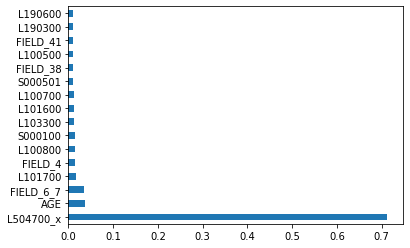

L504700_x    0.712052
AGE          0.037152
FIELD_6_7    0.035012
L101700      0.018115
FIELD_4      0.015407
L100800      0.015397
S000100      0.014287
L103300      0.013724
L101600      0.013618
L100700      0.012189
S000501      0.011548
FIELD_38     0.011132
dtype: float64
Index(['L504700_x', 'AGE', 'FIELD_6_7', 'L101700', 'FIELD_4', 'L100800',
       'S000100', 'L103300', 'L101600', 'L100700', 'S000501', 'FIELD_38'],
      dtype='object')


In [24]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

print(feat_importances.nlargest(12))
print(feat_importances.nlargest(12).index)

In [ ]:
# this function computes vif value which help us to remove columns with redundant information ( to avoid Multicollinearity)
# Multicollinearity occurs when two or more predictors in the model are correlated and provide redundant information about the response.
# Multicollinearity was measured by variance inflation factors (VIF) and tolerance


def vifcal(inputdata, depcol):
    vifL5 = []
    import statsmodels.formula.api as sm

    xvars = inputdata.drop([depcol], axis=1)
    xvarnames = xvars.columns
    for i in range(0, xvarnames.shape[0]):
        _y = xvars[xvarnames[i]]
        _x = xvars[xvarnames.drop(xvarnames[i])]
        rsq = sm.ols(formula="_y~_x", data=xvars).fit().rsquared
        vif = round(1 / (1 - rsq), 2)
        print(i, ", ", xvarnames[i], " VIF = ", vif)
        if vif < 5:
            vifL5.append(xvarnames[i])
    return vifL5

In [ ]:

newcols = vifcal(
    data2[
        [
            'L100700_y','L100700_x', 'SEX', 'S000300', 'L103000', 'L103100', 'L103300',
       'S000501', 'S000100', 'L101300', 'L190300', 'L100500', 'L101700'
        ]
    ],
    "L100700_y",
)
print(newcols, len(newcols))

============================= Backward Elimination
========

In [ ]:
import statsmodels.regression.linear_model as sm
temp=x.copy()
temp['const']=np.ones((x.shape[0],1))
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

In [ ]:
temp=temp.drop(columns=['L103000','L103300','L190300','FIELD_40','FIELD_27','FIELD_29','FIELD_21','FIELD_5','FIELD_14'])
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

In [ ]:
temp=temp.drop(columns=['FIELD_33'])
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

In [ ]:
temp.columns